In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [73]:
data_labels = pd.read_csv('../data/versions/3/Data_Entry_2017.csv')

print(data_labels.count())

Image Index                    112120
Finding Labels                 112120
Follow-up #                    112120
Patient ID                     112120
Patient Age                    112120
Patient Gender                 112120
View Position                  112120
OriginalImage[Width            112120
Height]                        112120
OriginalImagePixelSpacing[x    112120
y]                             112120
Unnamed: 11                         0
dtype: int64


In [74]:
print(data_labels['Unnamed: 11'].isna().sum())

112120


In [75]:
# We can see that data_labels['Unnamed: 11'] column only contains NaN values.
# We can drop this column as it does not provide any useful information.
data_labels = data_labels.drop(columns=['Unnamed: 11'])

print(data_labels.isna().sum())

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
dtype: int64


As we can see, there are no N/A values in this dataset.
Now we have to split 'Finding Labels' column into separate columns for each type of finding value. 

In [76]:

# All possible values of 'Finding Labels' column
finding_vals = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia', 
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia', 
                 'No Finding']

for val in finding_vals:
    data_labels[val] = data_labels['Finding Labels'].apply(lambda x: 1 if val in x else 0)

# Drop the original 'Finding Labels' column, it will be no longer needed
data_labels = data_labels.drop(columns=['Finding Labels'])

# Rename 'Image Index' column to 'image_id' for consistency
data_labels = data_labels.rename(columns={'Image Index': 'image_id'})


data_labels.head()

,image_id,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],...,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia,No Finding
0,00000001_000.png,0,1,58,M,PA,2682,2749,0.143,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,1,58,M,PA,2894,2729,0.143,0.143,...,0,0,0,0,0,1,0,0,0,0
2,00000001_002.png,2,1,58,M,PA,2500,2048,0.168,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,2,81,M,PA,2500,2048,0.171,0.171,...,0,0,0,0,0,0,0,0,0,1
4,00000003_000.png,0,3,81,F,PA,2582,2991,0.143,0.143,...,0,0,0,0,0,0,0,0,1,0


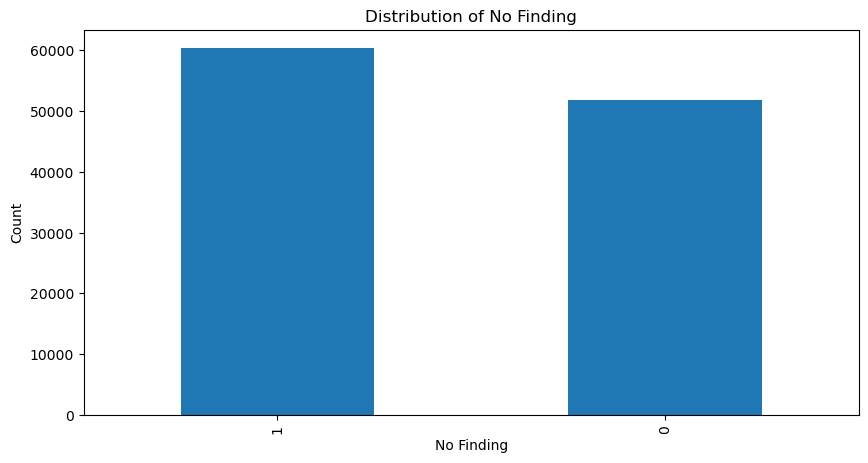

In [77]:
data_labels['No Finding'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of No Finding')
plt.xlabel('No Finding')
plt.ylabel('Count')
plt.show()

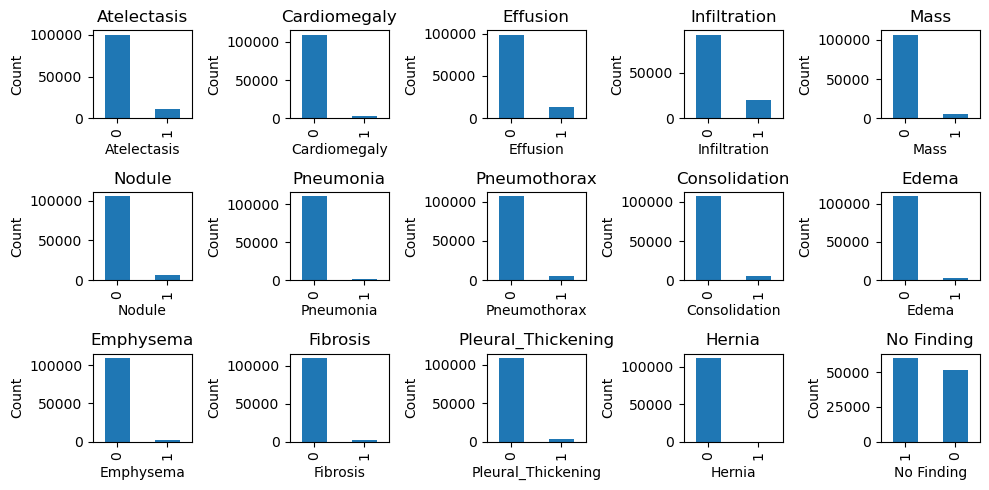

In [ ]:
data_labels['Patient ID'].nunique()

# There are 30 805 unique patients in the dataset, everything matches the original dataset.

### add plot how many images are there for each patient

### add info in a dict how many findings are there  by type of finding

fig, axes = plt.subplots(3, 5, figsize=(20, 15))
axes = axes.flatten()
for i, val in enumerate(finding_vals):
    data_labels[val].value_counts().plot(kind='bar', ax = axes[i], figsize=(10, 5))
    axes[i].set_title(f'{val}')
    axes[i].set_xlabel(val)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    axes[j].axis('off')  

plt.tight_layout()
plt.show()
